# LLM Frameworks: Pros and Cons

## Advantages
- Simplified setup and integration with LLMs
- Streamlined handling of common tasks like:
  - Making LLM API calls
  - Tool definition and parsing
  - Chain orchestration
- Reduced boilerplate code
- Faster development cycles

## Disadvantages
- Additional layers of abstraction
- Less visibility into underlying prompts and responses
- More challenging to debug issues
- Potential performance overhead
- May hide important implementation details

## Key Insights
- LLM frameworks provide convenience but don't enable fundamentally new capabilities
- Framework selection should align with your development style and needs
- Understanding the underlying prompts and mechanisms is crucial for effective framework usage

## References
- [Building Effective Agents - Anthropic Engineering Blog](https://www.anthropic.com/engineering/building-effective-agents)

# Example: Direct API Calling
Chain Workflow with each step progressively transforms raw text into a formatted table

[Using Anthropic cookbook example](https://github.com/anthropics/anthropic-cookbook/blob/main/patterns/agents/basic_workflows.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv
load_dotenv()
from vanilla_example import chain

In [3]:
data_processing_steps = [
    """Extract only the numerical values and their associated metrics from the text.
    Format each as 'value: metric' on a new line.
    Example format:
    92: customer satisfaction
    45%: revenue growth""",
    
    """Convert all numerical values to percentages where possible.
    If not a percentage or points, convert to decimal (e.g., 92 points -> 92%).
    Keep one number per line.
    Example format:
    92%: customer satisfaction
    45%: revenue growth""",
    
    """Sort all lines in descending order by numerical value.
    Keep the format 'value: metric' on each line.
    Example:
    92%: customer satisfaction
    87%: employee satisfaction""",
    
    """Format the sorted data as a markdown table with columns:
    | Metric | Value |
    |:--|--:|
    | Customer Satisfaction | 92% |"""
]

report = """
Q3 Performance Summary:
Our customer satisfaction score rose to 92 points this quarter.
Revenue grew by 45% compared to last year.
Market share is now at 23% in our primary market.
Customer churn decreased to 5% from 8%.
New user acquisition cost is $43 per user.
Product adoption rate increased to 78%.
Employee satisfaction is at 87 points.
Operating margin improved to 34%.
"""

print("\nInput text:")
print(report)
formatted_result = chain(report, data_processing_steps)
print(formatted_result)


Input text:

Q3 Performance Summary:
Our customer satisfaction score rose to 92 points this quarter.
Revenue grew by 45% compared to last year.
Market share is now at 23% in our primary market.
Customer churn decreased to 5% from 8%.
New user acquisition cost is $43 per user.
Product adoption rate increased to 78%.
Employee satisfaction is at 87 points.
Operating margin improved to 34%.


Step 1:
92: customer satisfaction  
45%: revenue growth  
23%: market share  
5%: customer churn  
$43: user acquisition cost  
78%: product adoption rate  
87: employee satisfaction  
34%: operating margin  

Step 2:
92%: customer satisfaction  
45%: revenue growth  
23%: market share  
5%: customer churn  
43%: user acquisition cost  
78%: product adoption rate  
87%: employee satisfaction  
34%: operating margin  

Step 3:
Here is the sorted list in descending order by numerical value:

92%: customer satisfaction  
87%: employee satisfaction  
78%: product adoption rate  
45%: revenue growth  
43%

# Example: with Langgraph

In [4]:
from langgraph_example import ReportProcessor
from IPython.display import Image, display

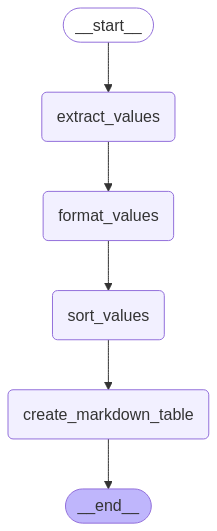

In [5]:
langgraph_processor = ReportProcessor()
langgraph_workflow = langgraph_processor.create_workflow()
display(Image(langgraph_workflow.get_graph().draw_mermaid_png()))

In [6]:
langgraph_state = langgraph_workflow.invoke({"report": report})

In [7]:
for key, value in langgraph_state.items():
    print(f"{key}:")
    print(value)
    print()

report:

Q3 Performance Summary:
Our customer satisfaction score rose to 92 points this quarter.
Revenue grew by 45% compared to last year.
Market share is now at 23% in our primary market.
Customer churn decreased to 5% from 8%.
New user acquisition cost is $43 per user.
Product adoption rate increased to 78%.
Employee satisfaction is at 87 points.
Operating margin improved to 34%.


extracted_values:
92: customer satisfaction  
45%: revenue growth  
23%: market share  
5%: customer churn  
$43: new user acquisition cost  
78%: product adoption rate  
87: employee satisfaction  
34%: operating margin  

formatted_values:
92%: customer satisfaction  
45%: revenue growth  
23%: market share  
5%: customer churn  
0.043: new user acquisition cost  
78%: product adoption rate  
87%: employee satisfaction  
34%: operating margin  

sorted_values:
Here are the lines sorted in descending order by numerical value:

```
92%: customer satisfaction  
87%: employee satisfaction  
78%: product ado

Langchain also has its own telemetry / tracing tool (Langsmith), which enables easier debug, monitoring and many other features
# ![Sample Langsmith](sample-langsmith.png)

# Example: with CrewAI

In [8]:
from crewai_example import ReportFormattingCrew

In [9]:
crew_instance = ReportFormattingCrew()
crew = crew_instance.crew()
inputs = {"content": report}
result = crew.kickoff(inputs=inputs)

# Agent: Report Formatting Specialist for 
## Task: Extract only the numerical values and their associated metrics from the provided report text.
Process the following report:
``` {content} ```
For each numerical value found, extract it along with its associated metric. Format each as 'value: metric' on a new line.
Example of expected output format: 92: customer satisfaction 45%: revenue growth



# Agent: Report Formatting Specialist for 
## Final Answer: 
92: customer satisfaction  
45%: revenue growth  
23%: market share  
5%: customer churn  
8%: previous customer churn  
$43: new user acquisition cost  
78%: product adoption rate  
87: employee satisfaction  
34%: operating margin


# Agent: Report Formatting Specialist for 
## Task: Convert all numerical values to percentages where possible. If not a percentage or points, convert to decimal (e.g., 92 points -> 92%). Keep one number per line. Example format: 92%: customer satisfaction 45%: revenue growth
Here are the values to con

# Additional Popular LLM Frameworks

The examples shown above demonstrate just a few of the available LLM frameworks. Here are some other popular frameworks worth exploring:

* [Llama Index](https://github.com/run-llama/llama_index) - A data framework for LLM applications (focus a lot on RAG)
* [SmalAgent](https://github.com/huggingface/smolagents) - Lightweight agents from Hugging Face
* [AutoGen](https://github.com/microsoft/autogen) - Multi-agent framework from Microsoft